# Import necessary packages and imdb data

In [ ]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
df = pd.read_json('/content/drive/MyDrive/imdb_titles_4_10.json')
df.head(2)

,original_title_name,title_name,poster,rating_view,release_year,release_date,country,language,title_duration_second,title_duration,imdb_rating,vote_count,title_url,title_trailer,genres,review_count,critic_review_count,cast,directors/creators,short_plot
0,Zeitgeist: Moving Forward,Zeitgeist: Moving Forward,https://m.media-amazon.com/images/M/MV5BNzc0OD...,Not Rated,2011,2011-01-15,United States,English,9660.0,2h 41m,8.1,18841,https://www.imdb.com/title/tt1781069/,https://www.imdb.com/video/vi2765593881/,[Documentary],67,3,"[Peter Joseph, Robert Sapolsky, Gabor Maté, Ri...",[Peter Joseph],A feature length documentary work which presen...
1,Life in a Day,Life in a Day,https://m.media-amazon.com/images/M/MV5BMjE4MD...,PG-13,2011,2011-01-27,"United Kingdom, United States","English, Italian, Japanese, German, Spanish, I...",5700.0,1h 35m,7.6,15664,https://www.imdb.com/title/tt1687247/,https://www.imdb.com/video/vi3867843609/,"[Documentary, Drama]",64,95,"[Hiroaki Aikawa, Cindy Baer, Teagan Bentley, E...","[Tegan Bukowski, Loressa Clisby, Kevin Macdonald]",A documentary shot by film-makers all over the...


**Important notice about the data:** This data was scraped from IMDb for a non-commercial project. Only titles with an IMDb rating above 4 and a total vote count above 15,000 were included to focus on the most successful films. The main purpose of this dataset is to identify actors with the highest number of appearances and to find popular American and European titles along with their main actors for building a face embeddings dataset. So, i wanna get around 80% result with 20% work this is concept.

# Missing values

## Checking missing values percent

In [ ]:
# but first default move is data checking

def check_data_missing_values(dataframe):
  total_length = dataframe.shape[0]
  columns = dataframe.columns
  missing_values_data = []

  for column in columns:
    missing_values = dataframe[column].isnull().sum()
    missing_values_percent = round(missing_values / total_length, 4)
    missing_values_data.append({'column': column,
                                '#_of_values': total_length,
                                '#_of_missing_values': missing_values,
                                '%_of_missing_values': missing_values_percent})

  df = pd.DataFrame(missing_values_data)
  df = df[df['#_of_missing_values'] > 0]
  return df.sort_values(by='#_of_missing_values', ascending=False)
  # return missing_values_data

check_data_missing_values(df)

,column,#_of_values,#_of_missing_values,%_of_missing_values
13,title_trailer,10896,434,0.0398
3,rating_view,10896,422,0.0387
18,directors/creators,10896,390,0.0358
9,title_duration,10896,84,0.0077
8,title_duration_second,10896,84,0.0077
5,release_date,10896,71,0.0065
7,language,10896,6,0.0006
6,country,10896,2,0.0002


So, we can see that there are some missing values. To be honest, the most disappointing part is that we have missing values in the 'directors/creators' column, while the others don’t really bother us. But let's take a closer look at the data with missing values.

In [ ]:
# see describe statistic of data with missing directors/creators
df[df['directors/creators'].isna()].describe()

,release_year,title_duration_second,imdb_rating,vote_count,review_count,critic_review_count
count,390.000000,367.000000,390.000000,390.000000,390.000000,390.000000
mean,2011.917949,3115.749319,7.918462,44476.689744,282.115385,17.369231
std,12.545380,1785.102719,0.865100,59231.364996,406.715415,15.156156
min,1951.000000,180.000000,4.200000,15042.000000,2.000000,0.000000
25%,2008.000000,1800.000000,7.500000,18742.750000,78.000000,6.000000
50%,2016.000000,3000.000000,8.100000,25273.000000,151.500000,14.000000
75%,2021.000000,3600.000000,8.500000,43507.750000,316.000000,24.000000
max,2025.000000,18000.000000,9.400000,585298.000000,3418.000000,97.000000


From this statistic we can't observe some sort of pattern in data with missing values in 'directors/creators' column.

### Dealing language and country columns

In [ ]:
for row in df.itertuples():
    language = row.language
    if isinstance(language, str) and 'None' in language:
        splited_data = language.split(', ')
        new_language_row = [record for record in splited_data if record != 'None']
        df.loc[row.Index, 'language'] = ', '.join(new_language_row) if new_language_row else None

In [ ]:
df[(df['language'].isna()) | (df['country'].isna())]

,original_title_name,title_name,poster,rating_view,release_year,release_date,country,language,title_duration_second,title_duration,imdb_rating,vote_count,title_url,title_trailer,genres,review_count,critic_review_count,cast,directors/creators,short_plot
386,Straume,Flow,https://m.media-amazon.com/images/M/MV5BOTM5OD...,PG,2024,2025-02-14,"Latvia, Belgium, France",None,5100.0,1h 25m,7.9,35306,https://www.imdb.com/title/tt4772188/,https://www.imdb.com/video/vi358598169/,"[Animation, Adventure, Family, Fantasy]",236,130,[],[Gints Zilbalodis],"Cat is a solitary animal, but as its home is d..."
4869,Robot Dreams,Robot Dreams,https://m.media-amazon.com/images/M/MV5BNjVhYW...,PG-13,2023,2024-06-07,"Spain, France, Italy",None,6180.0,1h 43m,7.6,19873,https://www.imdb.com/title/tt13429870/,https://www.imdb.com/video/vi1407239705/,"[Animation, Comedy, Drama, Family]",80,174,[Ivan Labanda],[Pablo Berger],The adventures and misfortunes of Dog and Robo...
7214,Baraka,Baraka,https://m.media-amazon.com/images/M/MV5BMzAxOT...,Not Rated,1992,1993-11-19,United States,None,5760.0,1h 36m,8.5,41857,https://www.imdb.com/title/tt0103767/,None,[Documentary],182,41,[Patrick Disanto],[Ron Fricke],A collection of expertly photographed scenes o...
7270,Samsara,Samsara,https://m.media-amazon.com/images/M/MV5BNjY3Nz...,PG-13,2011,2012-08-23,"United States, Indonesia, Singapore, Thailand,...",None,6120.0,1h 42m,8.4,38827,https://www.imdb.com/title/tt0770802/,https://www.imdb.com/video/vi435922201/,"[Documentary, Music]",112,86,"[Balinese Tari Legong Dancers, Ni Made Megahad...",[Ron Fricke],Filmed over nearly five years in twenty-five c...
7407,The General,The General,https://m.media-amazon.com/images/M/MV5BMTVhM2...,Passed,1926,1927-01-02,United States,None,4680.0,1h 18m,8.1,101597,https://www.imdb.com/title/tt0017925/,https://www.imdb.com/video/vi534623769/,"[Action, Adventure, Comedy, Drama, War]",373,134,"[Buster Keaton, Marion Mack, Glen Cavender, Ji...","[Clyde Bruckman, Buster Keaton]",After being rejected by the Confederate milita...
8568,Chelovek s kino-apparatom,Man with a Movie Camera,https://m.media-amazon.com/images/M/MV5BZDkzOT...,Not Rated,1929,1929-05-12,Soviet Union,None,4080.0,1h 8m,8.3,28940,https://www.imdb.com/title/tt0019760/,https://www.imdb.com/video/vi1865401113/,[Documentary],164,63,"[Mikhail Kaufman, Elizaveta Svilova]",[Dziga Vertov],A man travels around a city with a camera slun...
8609,La tortue rouge,The Red Turtle,https://m.media-amazon.com/images/M/MV5BYzNkNT...,PG,2016,2017-01-20,"France, Belgium, Japan, United States",None,4800.0,1h 20m,7.5,40080,https://www.imdb.com/title/tt3666024/,https://www.imdb.com/video/vi1519564313/,"[Animation, Drama, Family, Fantasy, Romance]",151,235,"[Emmanuel Garijo, Tom Hudson, Baptiste Goy, Ax...",[Michael Dudok de Wit],A man is shipwrecked on a deserted island and ...
8670,Black Hawk Down,Black Hawk Down,https://m.media-amazon.com/images/M/MV5BMTk5Nj...,Not Rated,1997,1997-12-01,None,None,3420.0,57m,7.9,34527,https://www.imdb.com/title/tt4330758/,https://www.imdb.com/video/vi4240816409/,[Documentary],1,0,"[Mike Goodale, Shawn Nelson, Dale Sizemore]",[Chris Mills],The story behind the infamous downing of an Am...
9945,Breathe,Breathe,https://m.media-amazon.com/images/M/MV5BMTczNj...,TV-MA,2018,2018-01-26,India,None,2700.0,45m,8.2,22248,https://www.imdb.com/title/tt6466208/,https://www.imdb.com/video/vi2549725209/,"[Crime, Drama, Thriller]",260,6,"[Madhavan, Amit Sadh, Sapna Pabbi, Shriswara, ...",None,This series just asks one question - how far w...
10190,Modern Love Mumbai,Modern Love Mumbai,https://m.media-amazon.com/images/M/MV5BYWQ1MD...,TV-MA,2022,2022-05-13,India,None,2400.0,40m,7.7,16642,https://www.imdb.com/title/tt18247152/,https://www.imdb.com/video/vi1335542297/,"[Comedy, Romance]",53,8,"[Jaideep Singh, Dilpreet Singh, Fatima Sana Sh...",None,Exploring 6 unique yet universal stories of hu...


So we can make some conclusion, if we have India in country column and in the same row None in language column probably we can input manually Hindi. So all missing values in columns language and country I manualyy input because we dont have much missing values there. Also some titles don't have specific language, I mean silent films.

In [ ]:
# here boring manual job
index = [386, 7214, 7270, 7407, 8568, 8609, 10283]
df.iloc[index, 7] = 'No info'
df.iloc[4869, 7] = 'Spanish'
df.iloc[8670, 6] = 'United Kingdom, United States'
df.iloc[8670, 7] = 'English'
df.iloc[9945, 7] = 'Hindi'
df.iloc[10190, 7] = 'Hindi'
df.iloc[10483, 7] = 'Hindi'
df.iloc[10895, 6] = 'South Korea'
df.iloc[10895, 7] = 'Korean'

### Dealing with rating_view, title_trailer, directors/creators, title_duration columns

In [ ]:
# then let's replace None and other missing values by some variable
index = df[(df['rating_view'].isna()) | (df['rating_view'] == 'Not Rated') | (df['rating_view'] == 'Unrated')].index
df.loc[index, 'rating_view'] = 'Unrated'

df.loc[df[df['title_trailer'].isna()].index, 'title_trailer'] = 'No info'
df.loc[df[df['directors/creators'].isna()].index, 'directors/creators'] = 'No info'

df.loc[df[df['title_duration'].isna()].index, 'title_duration'] = 'No info'

In [ ]:
# can delete release date column, because we have full release year column
df.drop(columns='release_date', inplace=True)

In [ ]:
# save data for next usage in json and csv
df.to_json('clean_imdb_titles_4_10.json', orient="records")
df.to_csv('clean_imdb_titles_4_10.csv', index=False)

# EDA

## Histograms

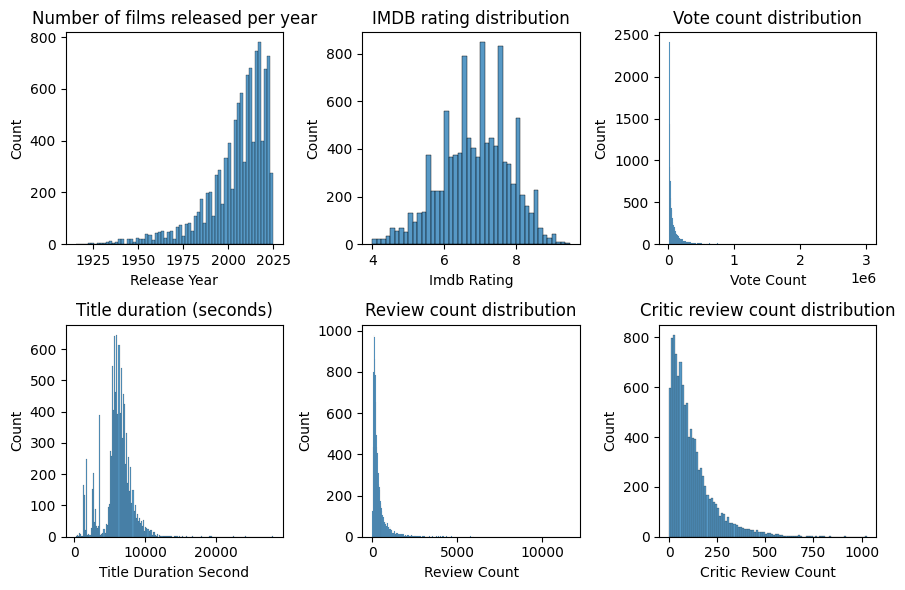

In [ ]:
# let's make simple histograms and make some conclusion

fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()

columns = ['release_year', 'imdb_rating', 'vote_count', 'title_duration_second', 'review_count', 'critic_review_count']
titles = [
    'Number of films released per year',
    'IMDB rating distribution',
    'Vote count distribution',
    'Title duration (seconds)',
    'Review count distribution',
    'Critic review count distribution'
]


for ax, col, title in zip(axes, columns, titles):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

As I mentioned, I scraped titles only with an IMDB rating above 4, so, as we can see in the IMDB rating distribution, we get nearly a normal distribution, but this is not true. We can also see that since 1920, there has been a huge rise in film production, which is exciting to observe. In this dataset, we have both films and series, including mini-series. As we can notice in the title duration histogram, there is a huge tail on the right (also in review count and critic review count). Additionally, we can see that there are some really popular titles with the most vote counts. It would be interesting to find out which title this is.

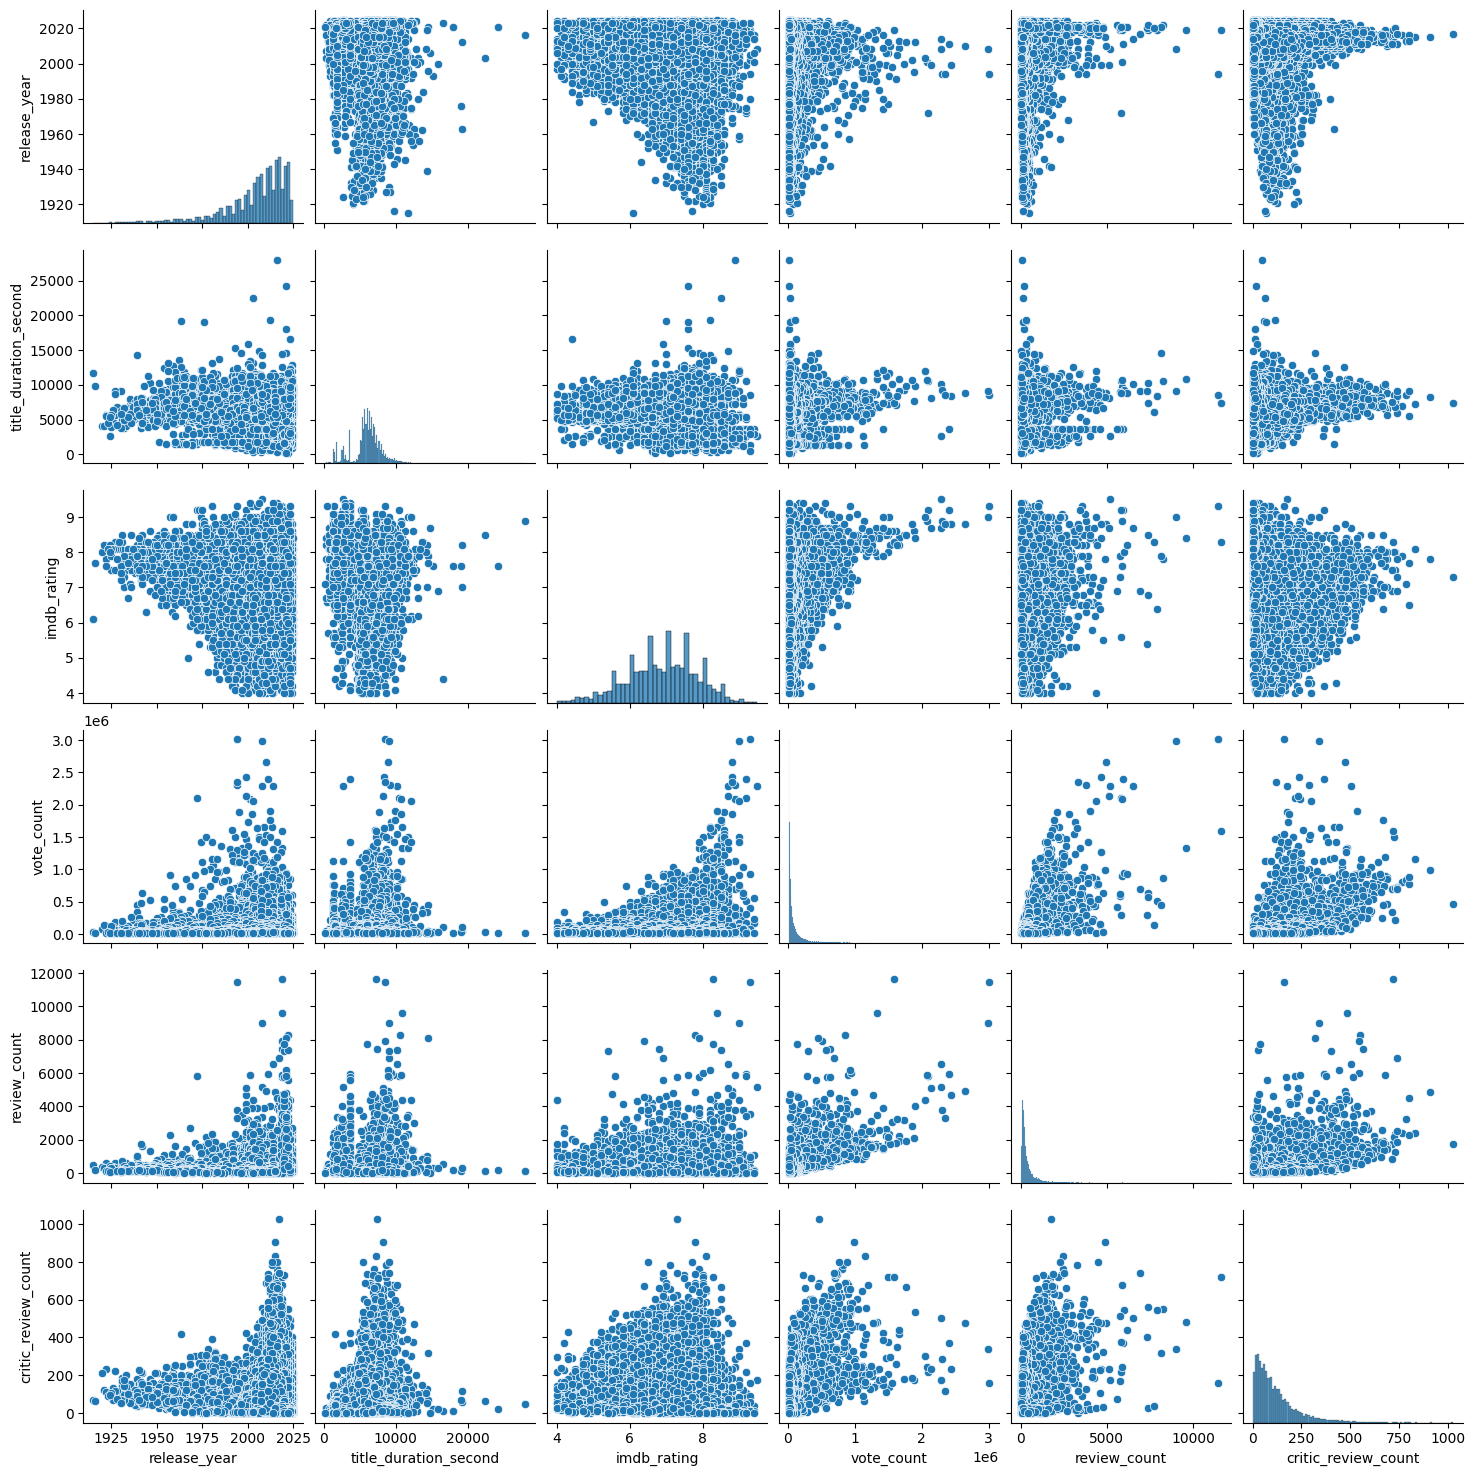

In [ ]:
# let's build pairplot to check if patterns exist in numeric data

sns.pairplot(data=df)
plt.show()

To be honest it's hard to say that data have patterns. We can suggest but not more.

## Top films by ...

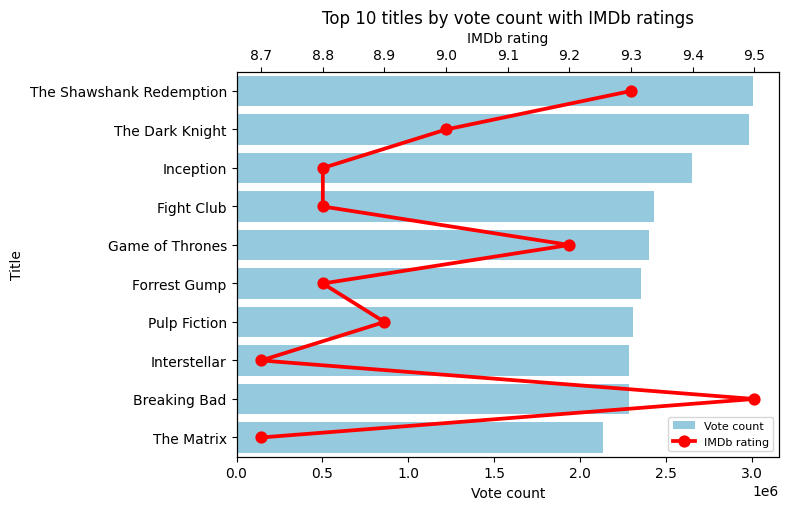

In [ ]:
top_10 = df.sort_values(by='vote_count', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(7, 5))
sns.barplot(
    y=top_10['original_title_name'],
    x=top_10['vote_count'],
    ax=ax1,
    color='skyblue',
    label='Vote count',
    legend=None
    )

ax2 = ax1.twiny()
sns.pointplot(
    y=top_10['original_title_name'],
    x=top_10['imdb_rating'],
    ax=ax2,
    color='red',
    marker='o',
    linestyles="-",
    label='IMDb rating',
    legend=None
    )

ax1.set_xlabel("Vote count")
ax2.set_xlabel("IMDb rating")
ax1.set_ylabel("Title")
plt.title("Top 10 titles by vote count with IMDb ratings")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_handles = handles1 + handles2
all_labels = labels1 + labels2

plt.legend(
    all_handles,
    all_labels,
    loc='lower right',
    prop={'size': 8}
    )

plt.show()

Wow, pretty interesting to see top 10 by vote count and observe that each of them have imdb rating high or equal to 8.7. To be honest some of this titles I haven't watched yet!

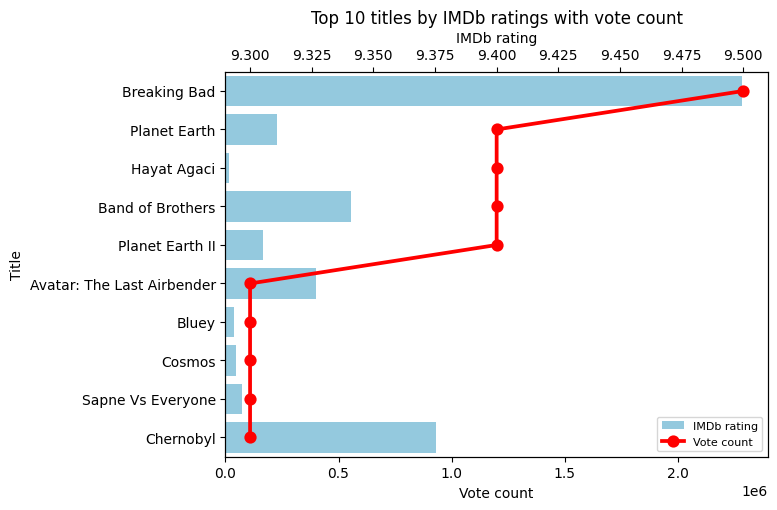

In [ ]:
# let's see top 10 titles by imdb_rating, what film is the best?

top_10 = df.sort_values(by='imdb_rating', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(7, 5))
sns.barplot(
    y=top_10['original_title_name'],
    x=top_10['vote_count'],
    ax=ax1,
    color='skyblue',
    label='IMDb rating',
    legend=None
    )

ax2 = ax1.twiny()
sns.pointplot(
    y=top_10['original_title_name'],
    x=top_10['imdb_rating'],
    ax=ax2,
    color='red',
    marker='o',
    linestyles="-",
    label='Vote count',
    legend=None
    )

ax1.set_xlabel("Vote count")
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel("IMDb rating")
ax1.set_ylabel("Title")
plt.title("Top 10 titles by IMDb ratings with vote count")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_handles = handles1 + handles2
all_labels = labels1 + labels2

plt.legend(
    all_handles,
    all_labels,
    loc='lower right',
    prop={'size': 8}
    )

plt.show()

To be honest, this is a pretty unexpected top list. It's interesting to see that only two titles have more than 200k votes, while some titles with high IMDb ratings have fewer than 50k votes.

In [ ]:
# I wanna watch top 1 title by imdb rating and vote count by each year from 1990 until 2025
top1_title_by_imdb_rating = pd.DataFrame()
top1_title_by_vote_count = pd.DataFrame()

for year in range(1990, 2026):
  temp_df = df[df['release_year'] == year]

  top1_by_imdb_rating = temp_df.sort_values(by='imdb_rating', ascending=False).head(1)
  top1_by_vote_count = temp_df.sort_values(by='vote_count', ascending=False).head(1)

  top1_title_by_imdb_rating = pd.concat([top1_title_by_imdb_rating, top1_by_imdb_rating], axis=0)
  top1_title_by_vote_count = pd.concat([top1_title_by_vote_count, top1_by_vote_count], axis=0)

  top1_title_by_imdb_rating.reset_index(drop=True, inplace=True)
  top1_title_by_vote_count.reset_index(drop=True, inplace=True)

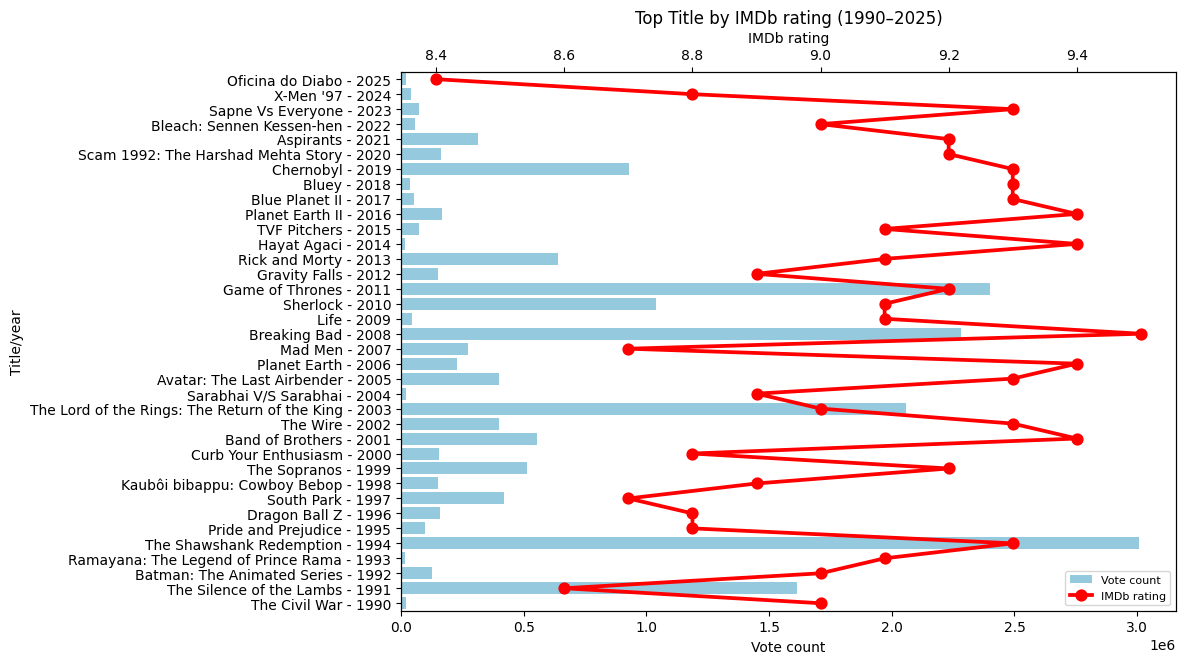

In [ ]:
top1_title_by_imdb_rating = top1_title_by_imdb_rating.sort_values(by='release_year', ascending=False)
top1_title_by_imdb_rating['year/title'] = top1_title_by_imdb_rating['original_title_name'] + ' - ' + top1_title_by_imdb_rating['release_year'].astype(str)

fig, ax1 = plt.subplots(figsize=(10, 7))
sns.barplot(
    data=top1_title_by_imdb_rating,
    y='year/title',
    x='vote_count',
    ax=ax1,
    color='skyblue',
    label='Vote count',
    legend=None
    )

ax2 = ax1.twiny()
sns.pointplot(
    data=top1_title_by_imdb_rating,
    y='year/title',
    x='imdb_rating',
    ax=ax2,
    color='red',
    marker='o',
    linestyles="-",
    label='IMDb rating',
    legend=None
    )

ax1.set_xlabel("Vote count")
ax2.set_xlabel("IMDb rating")
ax1.set_ylabel("Title/year")
plt.title("Top Title by IMDb rating (1990–2025)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_handles = handles1 + handles2
all_labels = labels1 + labels2

plt.legend(
    all_handles,
    all_labels,
    loc='lower right',
    prop={'size': 8}
    )

plt.show()

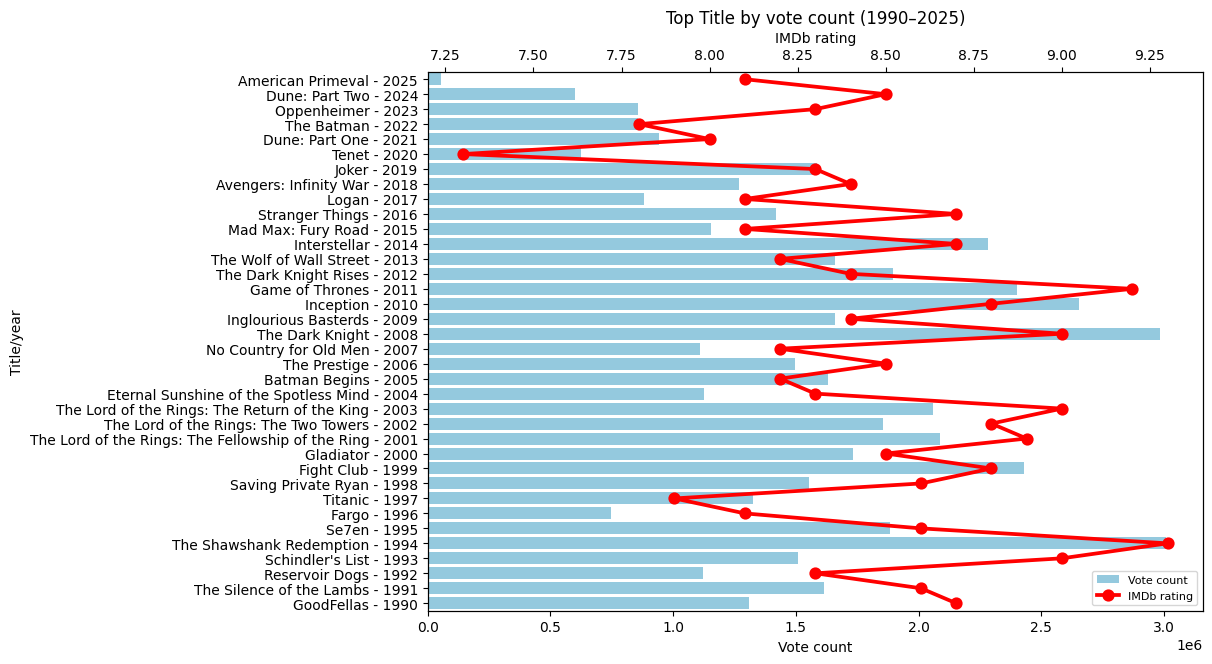

In [ ]:
top1_title_by_vote_count = top1_title_by_vote_count.sort_values(by='release_year', ascending=False)
top1_title_by_vote_count['year/title'] = top1_title_by_vote_count['original_title_name'] + ' - ' + top1_title_by_vote_count['release_year'].astype(str)

fig, ax1 = plt.subplots(figsize=(10, 7))
sns.barplot(
    data=top1_title_by_vote_count,
    y='year/title',
    x='vote_count',
    ax=ax1,
    color='skyblue',
    label='Vote count',
    legend=None
    )

ax2 = ax1.twiny()
sns.pointplot(
    data=top1_title_by_vote_count,
    y='year/title',
    x='imdb_rating',
    ax=ax2,
    color='red',
    marker='o',
    linestyles="-",
    label='IMDb rating',
    legend=None
    )

ax1.set_xlabel("Vote count")
ax2.set_xlabel("IMDb rating")
ax1.set_ylabel("Title/year")
plt.title("Top Title by vote count (1990–2025)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_handles = handles1 + handles2
all_labels = labels1 + labels2

plt.legend(
    all_handles,
    all_labels,
    loc='lower right',
    prop={'size': 8}
    )

plt.show()

In [ ]:
def get_top3_and_other_count(dataframe, column):
  top_3 = dataframe.nlargest(3, 'count')
  other_count = dataframe[~dataframe[column].isin(top_3[column])]['count'].sum()
  final_df = pd.concat([top_3, pd.DataFrame({column: ['Other'], 'count': [other_count]})], ignore_index=True)

  return final_df

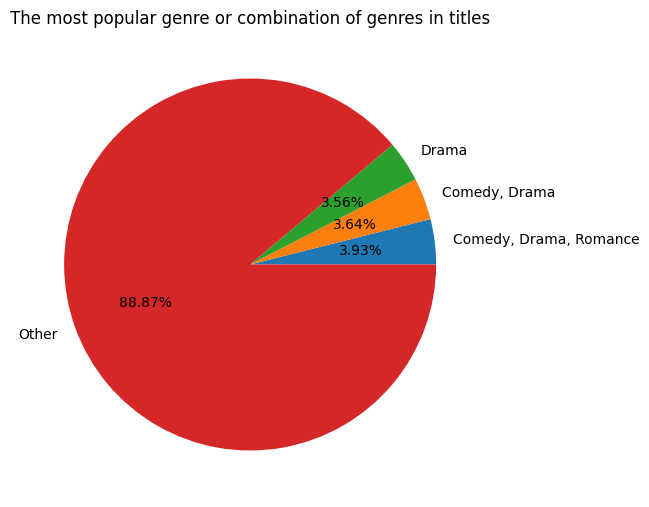

In [ ]:
# first figure out what exactly genre or combination of genres are more popular in all title
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

genres_df = df.groupby('genres').size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)
final_df = get_top3_and_other_count(genres_df, 'genres')

plt.figure(figsize=(6, 8))
plt.pie(
    final_df['count'],
    labels=final_df['genres'],
    autopct='%1.2f%%',
    textprops={'fontsize':10}
    )
plt.title('The most popular genre or combination of genres in titles')

plt.show()

It's interesting to observe the prevalence of certain genre combinations. The popularity of Comedy, Drama, and Romance is unsurprising, as this blend appeals to a broad audience. We can also see that Drama features in all of the top three genre combinations, while Comedy appears in two. However, it would be more insightful to examine the specific characteristics within these genres that are most frequently used.

In [ ]:
# first let's make function which count all values from one column through whole dataset
def count_values_from_column(dataframe, column):
  all_info_count_from_column = {}

  for main_row in dataframe.itertuples():
      data_record = getattr(main_row, column)

      if pd.isna(data_record):
          continue

      splited_data = data_record.split(', ') if isinstance(data_record, str) else [data_record]

      for record in splited_data:
          all_info_count_from_column[record] = all_info_count_from_column.get(record, 0) + 1


  df = pd.DataFrame.from_dict(
      all_info_count_from_column,
      orient='index',
      columns=['count']
      ).reset_index().rename(columns={'index': column})

  return df.sort_values(by='count', ascending=False)

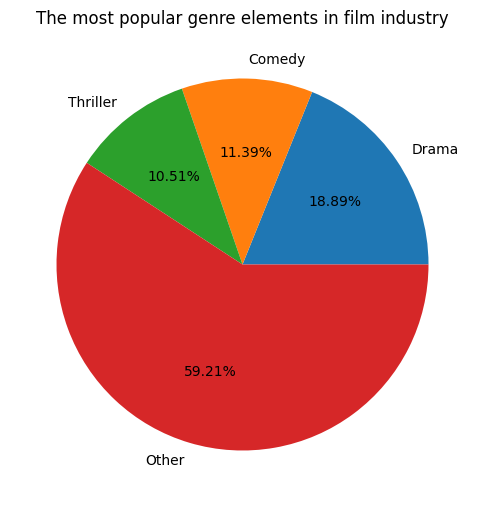

In [ ]:
# make nearly the same process
genres_df = count_values_from_column(df, 'genres')
final_df = get_top3_and_other_count(genres_df, 'genres')

plt.figure(figsize=(6, 8))
plt.pie(
    final_df['count'],
    labels=final_df['genres'],
    autopct='%1.2f%%',
    textprops={'fontsize':10}
    )
plt.title('The most popular genre elements in film industry')

plt.show()

Drama and comedy elements are used the most, and thriller is also in the top3.

## Motherland of film industry

If someone asked me this question, I would definitely answer 'the USA', but let's confirm that.

In [ ]:
# Let's find out which country produces the most titles (countries of origin)
df.groupby('country').size().reset_index().rename(columns={0: 'count'}).sort_values(by='count', ascending=False).head(10)

,country,count
1000,United States,5057
427,India,542
939,"United Kingdom, United States",413
749,United Kingdom,343
1042,"United States, Canada",253
532,Japan,233
1380,"United States, United Kingdom",207
101,"Canada, United States",113
209,France,94
734,Turkey,94


No wonder USA is motherland of film industry. All know Hollywood and Hollywood Walk of Fame etc. To be honest it is quite surprise to see Turkey so high. India also holds a very high position, which is not surprising either, as the country has a large domestic market. But also we see different combination of countries as a title producer, let's check how many times each country participate in film production.

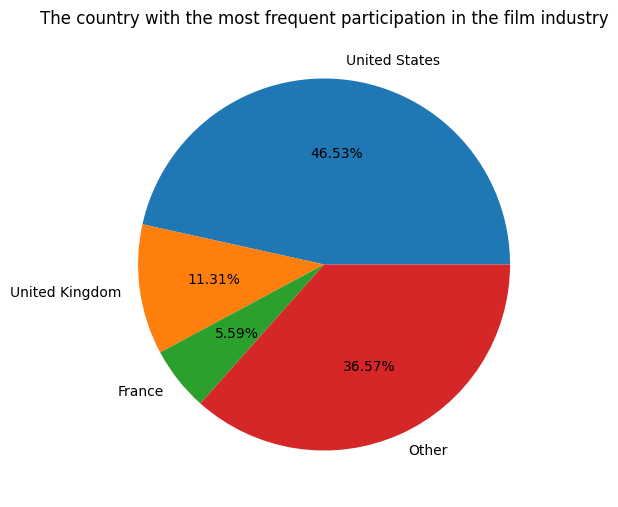

In [ ]:
# so, let's count the most involved countries in film industry
country_df = count_values_from_column(df, 'country')
final_df = get_top3_and_other_count(country_df, 'country')

plt.figure(figsize=(6, 8))
plt.pie(
    final_df.iloc[:, 1],
    labels=final_df.iloc[:, 0],
    autopct='%1.2f%%',
    textprops={'fontsize':10}
    )
plt.title('The country with the most frequent participation in the film industry')

plt.show()

Again, no surprise, the USA is in first place and get majority part of all production, France in top3.

##What language the most popular in film industry

As in the previous section, I can confidently say it's English. Let's confirm that.

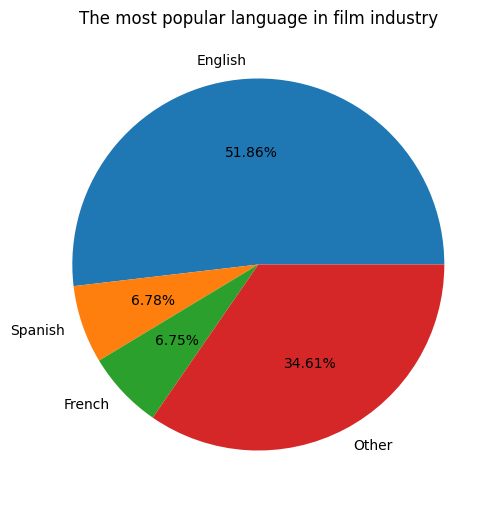

In [ ]:
language_df = count_values_from_column(df, 'language')
final_df = get_top3_and_other_count(language_df, 'language')

plt.figure(figsize=(6, 8))
plt.pie(
    final_df.iloc[:, 1],
    labels=final_df.iloc[:, 0],
    autopct='%1.2f%%',
    textprops={'fontsize':10}
    )
plt.title('The most popular language in film industry')

plt.show()

So, as I expected, English is the top language, but I thought it would have a larger share. It is probable that other languages appear in titles as supplementary languages.

##Top actors

In [ ]:
# As I am most interested in American and European filmography, I am filtering popular titles from those regions to identify the most popular actors
language_to_remove = language_df[language_df['count'] < 550]['language'].to_list()
countries_to_remove = country_df[country_df['count'] < 700]['country'].to_list()

temporary_df = df[~((df['country'].isin(countries_to_remove)) | (df['language'].isin(language_to_remove)))]
temporary_df.shape

(9455, 19)

The method described above is quite rough and doesn't fully satisfy the filtering requirements, but I will use it for the next stage of scraping top actors.

In [ ]:
# so this what i need to find out for my actor face database
actor_filmcount = {}

for row in temporary_df.itertuples():
  cast_info = row.cast
  for actor in cast_info:
    if actor in actor_filmcount.keys():
      actor_filmcount[actor]+=1
    else:
      actor_filmcount.update({actor: 1})

actor_df = pd.DataFrame.from_dict(
    actor_filmcount,
    orient='index',
    columns=['count']).reset_index().rename(columns={'index': 'actor'})

actor_df = actor_df.sort_values(by='count', ascending=False)

In [ ]:
print(f"There are {actor_df.shape[0]} unique actors in {df.shape[0]} unique titles.")

There are 76402 unique actors in 10896 unique titles.


However, not all of these individuals are necessarily on-screen actors. The dataset includes animated titles, which may feature voice actors or other types of performers. And I need to somehow filter that.

In [ ]:
# top5 actors
actor_df.head()

,actor,count
270,Samuel L. Jackson,86
1019,Robert De Niro,79
3216,Nicolas Cage,69
1731,Bruce Willis,67
3155,Morgan Freeman,67


Samuel L. Jackson, Robert De Niro, and Nicolas Cage are among the most prolific actors in the film industry, with numerous IMDb ratings above 4.


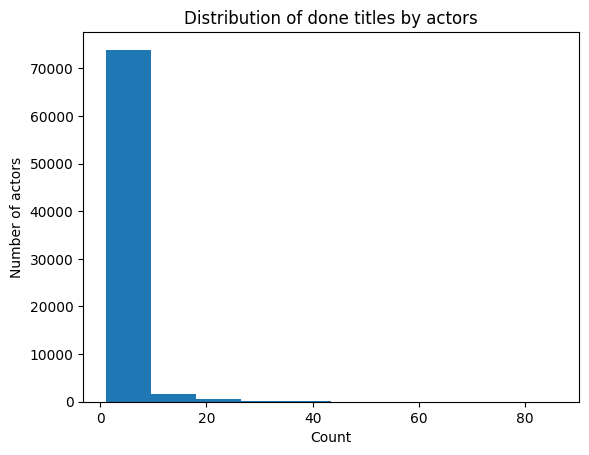

In [ ]:
# let's see distribution of actor film counts

plt.hist(actor_df['count'])
plt.xlabel('Count')
plt.ylabel('Number of actors')
plt.title('Distribution of done titles by actors')

plt.show()

We see that we have large right tail and that is what we need the most, because i wanna figure out the most popular actors, because I don't wanna make face database of 91263 person.

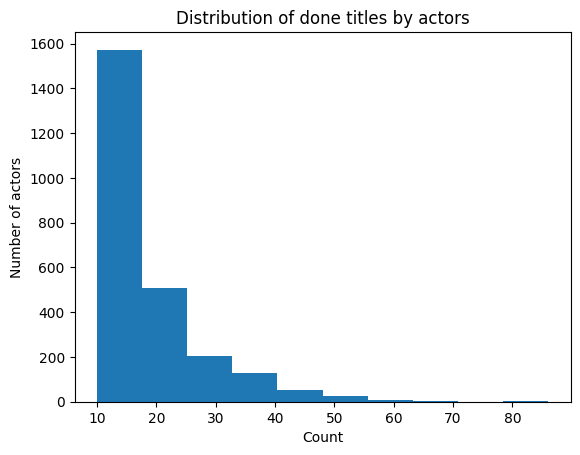

In [ ]:
# let's see distribution of actor which participated more than 9 titles

temp_actor_df = actor_df[actor_df['count'] > 9]
plt.hist(temp_actor_df['count'])
plt.xlabel('Count')
plt.ylabel('Number of actors')
plt.title('Distribution of done titles by actors')

plt.show()

In [ ]:
# let's make function which grab from dataset all titles info for two actors and compare the data.
def compare_actors(dataframe, first_actor, second_actor):
  first_part_df = dataframe[dataframe['cast'].apply(lambda x: isinstance(x, list) and first_actor in x)].copy()
  first_part_df['actor'] = first_actor

  second_part_df = dataframe[dataframe['cast'].apply(lambda x: isinstance(x, list) and second_actor in x)].copy()
  second_part_df['actor'] = second_actor

  merged_dataframe = pd.concat([first_part_df, second_part_df], axis=0)

  grouped_df = merged_dataframe.groupby('actor').agg({
    'actor': 'count',
    'imdb_rating': ['mean', 'max', 'min'],
    'vote_count': ['max'],
    'release_year': ['max', 'min']
    })

  grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns]
  grouped_df['imdb_rating_mean'] = grouped_df['imdb_rating_mean'].round(2)
  grouped_df.rename(columns={
      'actor_count': 'total_titles',
      'release_year_max': 'last_release_year',
      'release_year_min': 'first_release_year'}, inplace=True)
  grouped_df.reset_index(inplace=True)

  return grouped_df

In [ ]:
compare_actors(df, 'Leonardo DiCaprio', 'Brad Pitt')

,actor,total_titles,imdb_rating_mean,imdb_rating_max,imdb_rating_min,vote_count_max,last_release_year,first_release_year
0,Brad Pitt,47,7.08,8.8,4.8,2431690,2024,1991
1,Leonardo DiCaprio,31,7.35,8.8,5.4,2652924,2023,1985


In [ ]:
# save actors tabel for creation of face embedding database

actor_df[:500].to_csv('first_500_actors.csv', index=False)
actor_df[:1000].to_csv('first_1000_actors.csv', index=False)
temp_actor_df.to_csv('actors_with_more_than_9_titles.csv', index=False)

##Top directors/creators

In [ ]:
def convert_from_list_into_string(row):
  if row == 'No info':
    return row
  return ", ".join(item for item in row)


temporary_df['directors_creators'] = temporary_df['directors/creators'].apply(lambda x: convert_from_list_into_string(x))
temporary_df.drop(columns='directors/creators', inplace=True)

<ipython-input-149-56169ae25591>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df['directors_creators'] = temporary_df['directors/creators'].apply(lambda x: convert_from_list_into_string(x))
<ipython-input-149-56169ae25591>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df.drop(columns='directors/creators', inplace=True)


In [ ]:
# first of all let's just check the director/creator with highest imdb score and more than 2 work at least
temp_director_df = temporary_df.groupby('directors_creators')['imdb_rating'].agg(
    ['mean', 'max', 'count']).reset_index().sort_values(by='mean', ascending=False)

temp_director_df[temp_director_df['count'] > 2].head(10)

,directors_creators,mean,max,count
3672,Sergio Leone,8.340000,8.8,5
511,Bryan Fuller,8.333333,8.5,3
3559,Russell T. Davies,8.200000,8.6,3
581,Charles Chaplin,8.200000,8.5,8
703,Christopher Nolan,8.166667,9.0,12
154,Amy Sherman-Palladino,8.133333,8.7,3
3259,Phoebe Waller-Bridge,8.133333,8.7,3
2222,Julian Fellowes,8.100000,8.7,3
3274,Quentin Tarantino,8.081818,8.9,11
1305,Frank Darabont,8.000000,9.3,5


To be honest, the results were quite unexpected. I anticipated seeing Quentin Tarantino, James Cameron, or other directors known for large-scale productions. Instead, the top-ranked directors are primarily those with a more localized focus, producing a smaller body of work but receiving high acclaim within their regional markets.

In [ ]:
# let's also find out the people which participate in most film product
count_values_from_column(temporary_df, 'directors_creators')[1:11]

,directors_creators,count
11,Woody Allen,47
51,Clint Eastwood,36
162,Steven Spielberg,34
1025,Alfred Hitchcock,31
238,Ridley Scott,28
552,Martin Scorsese,27
176,Ron Howard,25
1135,Steven Soderbergh,25
537,Robert Zemeckis,21
217,Tim Burton,20


From this short top we see some legends of cinematography

#END

In this file you can see another jupyter notebook with tf-idf recommendation system and recommendation system by using transform.